## Data Analysis


        - 


In [52]:
# package imports go here
import pandas as pd
import numpy as np
import fastparquet as fp
import os
import sys
import pickle
import matplotlib.pyplot as plt
import importlib

sys.path.insert(1, 'pkgs')
import ml_analysis as mlanlys

In [53]:
# Path to results
year = 2021
source_path         = "data/"
final_clean_file    = source_path + 'brfss_' + str(year) + '_clean_final.parquet.gzip'

In [54]:
# Read final cleaned dataset from parquet file
df = pd.read_parquet(final_clean_file, engine="fastparquet")

In [55]:
df

,general_health,days_health_not_good,days_mental_not_good,primary_insurance_source,personal_provider,years_since_checkup,exercise,told_high_blood_pressure,year_chol_chckd,high_cholesteral,...,drinks_cats,fruit_juice,fruit_times_perday,darkG_vege,french_fry,potato,other_vege,tot_fruits,tot_vege,fruit_1_yn
index,,,,,,,,,,,,,,,,,,,,,
0,5.0,20.0,10.0,3.0,1.0,2.0,2.0,3.0,2.0,1.0,...,1.0,5.397605e-79,100.0,5.700000e+01,4.300000e+01,1.400000e+01,100.0,100.0,214.0,1.0
2,2.0,88.0,88.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,...,1.0,5.397605e-79,100.0,5.397605e-79,1.400000e+01,1.400000e+01,43.0,100.0,71.0,1.0
3,2.0,88.0,10.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,7.100000e+01,43.0,1.000000e+01,5.700000e+01,2.700000e+01,71.0,114.0,165.0,1.0
5,3.0,88.0,88.0,3.0,1.0,1.0,2.0,3.0,2.0,2.0,...,1.0,5.397605e-79,29.0,1.400000e+01,5.397605e-79,1.400000e+01,14.0,29.0,42.0,2.0
9,3.0,25.0,5.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,...,1.0,5.397605e-79,100.0,2.900000e+01,2.900000e+01,4.300000e+01,57.0,100.0,158.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438685,3.0,88.0,88.0,10.0,1.0,3.0,1.0,1.0,8.0,1.0,...,1.0,5.397605e-79,57.0,4.300000e+01,5.397605e-79,7.000000e+00,100.0,57.0,150.0,2.0
438686,2.0,5.0,88.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,...,1.0,1.000000e+02,100.0,2.900000e+01,5.397605e-79,5.397605e-79,43.0,200.0,72.0,1.0
438687,4.0,88.0,88.0,3.0,1.0,3.0,1.0,1.0,4.0,1.0,...,1.0,2.000000e+02,50.0,2.000000e+02,1.400000e+01,1.400000e+01,71.0,250.0,299.0,1.0


In [56]:
df.columns

Index(['general_health', 'days_health_not_good', 'days_mental_not_good',
       'primary_insurance_source', 'personal_provider', 'years_since_checkup',
       'exercise', 'told_high_blood_pressure', 'year_chol_chckd',
       'high_cholesteral', 'high_cholesteral_meds', 'ever_heart_disease',
       'ever_stroke', 'depressive_disorder', 'ekidney_disease', 'diabetes',
       'marital', 'education_level', 'own_home', 'employment', 'income_level',
       'weight-lbs', 'hearing', 'sight', 'diffwalk', 'flu_shot', 'race_grp5',
       'good_health', 'have_insurance', 'activity_level', 'heart_chd_mi',
       'race_grp8', 'race_grp8a', 'race_grp5a', 'sex', 'age_5yr',
       'weight_kilos', 'body_mass_index', 'BMI_cats', 'ceduc_cats',
       'income _cats', 'smoking_status', 'smoking_yn', 'ecig_yn',
       'drinks_week', 'drinks_cats', 'fruit_juice', 'fruit_times_perday',
       'darkG_vege', 'french_fry', 'potato', 'other_vege', 'tot_fruits',
       'tot_vege', 'fruit_1_yn'],
      dtype='object'

In [57]:
diabetes_labels = ['general_health', 'days_health_not_good', 'days_mental_not_good',
        'primary_insurance_source', 'personal_provider', 'years_since_checkup',
        'exercise', 'told_high_blood_pressure', 'year_chol_chckd',
        'high_cholesteral', 'high_cholesteral_meds', 'ever_heart_disease',
        'ever_stroke', 'depressive_disorder', 'ekidney_disease', 'diabetes',
        'marital', 'education_level', 'own_home', 'employment', 'income_level',
        'weight-lbs', 'hearing', 'sight', 'diffwalk', 'flu_shot', 'race_grp5',
        'good_health', 'have_insurance', 'activity_level', 'heart_chd_mi',
        'race_grp8', 'race_grp8a', 'race_grp5a', 'sex', 'age_5yr',
        'weight_kilos', 'body_mass_index', 'BMI_cats', 'ceduc_cats',
        'income _cats', 'smoking_status', 'smoking_yn', 'ecig_yn',
        'drinks_week', 'drinks_cats', 'fruit_juice', 'fruit_times_perday',
        'darkG_vege', 'french_fry', 'potato', 'other_vege', 'tot_fruits',
        'tot_vege', 'fruit_1_yn']

/tmp/ipykernel_1210471/4271011497.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)
/tmp/ipykernel_1210471/4271011497.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels,fontsize=6)
/tmp/ipykernel_1210471/4271011497.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(labels,fontsize=6)


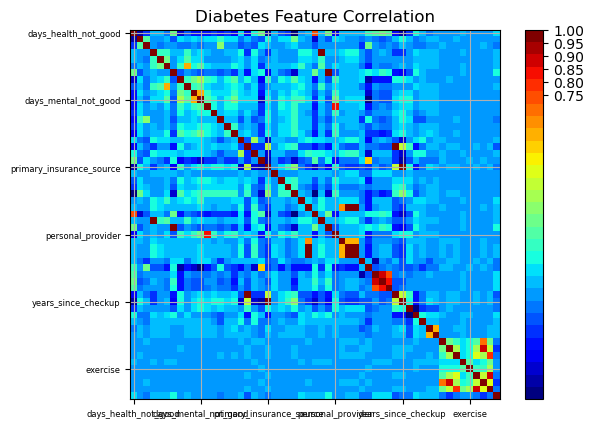

In [58]:
def correlation_matrix(df, labels):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Diabetes Feature Correlation')
#    labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df, diabetes_labels)

Note: It appears that we have some features that are similar:  Correlated with each other

# Check the cleaned dataset

In [59]:
feature_df = df.copy()

In [60]:
num_top = 10
target = 'diabetes'
feature_df.describe()

print(f"Diabetes value counts: feature_df['diabetes'].value_counts")

correlations = feature_df.corrwith(feature_df[target])

desc_sorted_correlations = correlations.sort_values(ascending=False)
asc_sorted_correlations = correlations.sort_values()
# Exclude the target itself if present
desc_top_correlations = desc_sorted_correlations.head(num_top + 1).drop(labels=[target], errors='ignore')
asc_top_correlations = asc_sorted_correlations.head(num_top + 1).drop(labels=[target], errors='ignore')

print("\nTop", num_top, "positive correlations:")
print(desc_top_correlations)

print("\nTop", num_top, "negative correlations:")
print(asc_top_correlations)

Diabetes value counts: feature_df['diabetes'].value_counts

Top 10 positive correlations:
high_cholesteral_meds       0.284240
told_high_blood_pressure    0.231973
diffwalk                    0.190170
high_cholesteral            0.174012
heart_chd_mi                0.161054
ekidney_disease             0.151345
ever_heart_disease          0.140932
income_level                0.134788
income _cats                0.133838
year_chol_chckd             0.120471
dtype: float64

Top 10 negative correlations:
general_health    -0.255074
good_health       -0.216874
body_mass_index   -0.182067
age_5yr           -0.166824
BMI_cats          -0.163183
employment        -0.162701
weight_kilos      -0.155406
exercise          -0.136540
activity_level    -0.136540
fruit_1_yn        -0.024491
race_grp5         -0.016531
dtype: float64


**Note:** It does not look like any individual features are correlated with diabetes on their own.

In [61]:
#correlation_df = df.corr()
# Assuming df is your dataframe
correlation_matrix = df.corr()

In [62]:
# Unstack the correlation matrix
correlation_series = correlation_matrix.unstack()

# Convert to DataFrame for better readability
correlation_df = pd.DataFrame(correlation_series, columns=['Correlation'])

# Remove self-correlations by filtering out where the same feature is correlated with itself
correlation_df = correlation_df[correlation_df.index.get_level_values(0) != correlation_df.index.get_level_values(1)]

# Sort by the absolute value of the correlation
correlation_df['AbsoluteCorrelation'] = correlation_df['Correlation'].abs()
sorted_correlation_df = correlation_df.sort_values(by='AbsoluteCorrelation', ascending=False)

# Optionally, you can keep only the top N correlations
sorted_correlation_df.head(40)


,,Correlation,AbsoluteCorrelation
exercise,activity_level,1.000000,1.000000
activity_level,exercise,1.000000,1.000000
ceduc_cats,education_level,0.993465,0.993465
education_level,ceduc_cats,0.993465,0.993465
primary_insurance_source,have_insurance,0.990747,0.990747
have_insurance,primary_insurance_source,0.990747,0.990747
race_grp5a,race_grp8a,0.987292,0.987292
race_grp8a,race_grp5a,0.987292,0.987292
income _cats,income_level,0.980318,0.980318
income_level,income _cats,0.980318,0.980318


**Note:** Based on the inter-correlation above, we can eliminate some columns

---

### Eliminate correlated features

In [63]:
# TBD

### Run initial Tests

In [64]:
from sklearn.datasets import make_regression, make_swiss_roll
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
X = df.copy().drop(columns=["diabetes"])
y = df['diabetes']

In [66]:
# Create Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [67]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)

In [ ]:
# def test_model(model, data):
#     X_train_scaled, X_test_scaled, y_train, y_test = data
#     reg = model.fit(X_train_scaled, y_train)
#     print(f'Model: {type(reg).__name__}')
#     print(f'Train score: {reg.score(X_train_scaled, y_train)}')
#     print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
#     plt.show()

In [68]:
data_scaled = [X_train_scaled, X_test_scaled, y_train, y_test]
data_raw    = [X_train, X_test, y_train, y_test]


In [ ]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
# from sklearn.svm import SVR
# from sklearn.svm import SVC 
# from sklearn.linear_model import LogisticRegression

# from sklearn.ensemble import RandomForestClassifier
# from sklearn import tree
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier

In [69]:
# reload any changes to mlconfigs
importlib.reload(mlanlys)

<module 'ml_analysis' from '/mnt/c/ML/DU/repos/projects/project-2/DU-project-2/pkgs/ml_analysis.py'>

Find KNN n_neighbors value

k: 1, Train/Test Score: 1.000/0.757
k: 3, Train/Test Score: 0.877/0.800
k: 5, Train/Test Score: 0.859/0.815
k: 7, Train/Test Score: 0.853/0.821
k: 9, Train/Test Score: 0.850/0.825


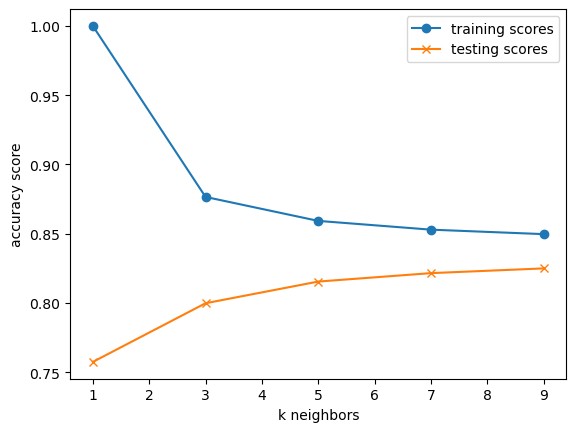

In [70]:
mlanlys.knn_plot(data_scaled)

In [48]:
# X_train, X_test, y_train, y_test = data_raw
# k_range = 10
# train_scores = []
# test_scores = []
# for k in range(1, k_range, 2):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     train_score = knn.score(X_train, y_train)
#     test_score = knn.score(X_test, y_test)
#     train_scores.append(train_score)
#     test_scores.append(test_score)
#     print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

In [49]:
# import matplotlib.pyplot as plt
# # Plot the results
# plt.plot(range(1, k_range, 2), train_scores, marker='o', label="training scores")
# plt.plot(range(1, k_range, 2), test_scores, marker="x", label="testing scores")
# plt.xlabel("k neighbors")
# plt.ylabel("accuracy score")
# plt.legend()
# plt.show()

In [ ]:
# def knn_plot( data ):
#     X_train, X_test, y_train, y_test = data
#     k_range = 10
#     train_scores = []
#     test_scores = []
#     for k in range(1, k_range, 2):
#         knn = KNeighborsClassifier(n_neighbors=k)
#         knn.fit(X_train, y_train)
#         train_score = knn.score(X_train, y_train)
#         test_score = knn.score(X_test, y_test)
#         train_scores.append(train_score)
#         test_scores.append(test_score)
#         print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
        
#     # Plot the results
#     plt.plot(range(1, k_range, 2), train_scores, marker='o', label="training scores")
#     plt.plot(range(1, k_range, 2), test_scores, marker="x", label="testing scores")
#     plt.xlabel("k neighbors")
#     plt.ylabel("accuracy score")
#     plt.legend()
#     plt.show()

In [ ]:
# Determine k-value for scaled data
#knn_plot( data_scaled)

In [ ]:
def run_all_models(data, k_value):
    print(f"----------------------------------------------------------------")
    print(f"-------- Project_2 Models")
    print(f"----------------------------------------------------------------")
    test_model(SVC(kernel='linear'), data)

    test_model(KNeighborsClassifier(n_neighbors=k_value), data)
    test_model(tree.DecisionTreeClassifier(), data)
    test_model(RandomForestClassifier(), data)
    test_model(ExtraTreesClassifier(random_state=1), data)
    test_model(GradientBoostingClassifier(random_state=1), data)
    test_model(AdaBoostClassifier(random_state=1), data)

    test_model(LogisticRegression(), data)

    # print(f"\n----------------------------------------------------------------")
    # print(f"-------- Regression Models")
    # print(f"----------------------------------------------------------------")

    # test_model(LinearRegression(), data)

    # test_model(KNeighborsRegressor(), data)
    # test_model(RandomForestRegressor(), data)
    # test_model(ExtraTreesRegressor(), data)
    # test_model(AdaBoostRegressor(), data)
    # test_model(SVR(C=1.0, epsilon=0.2), data)

## To DO

- correlation work in features (inter-corrlation)
- handle unbalanced data
    - split the data into equal size for has and does not have diabetes ()
- automate the model
- scaling
- optimization
    - ????????

- Encoding
    from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

- sklearn - Model Evaluation
    - [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)
    - [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

# Test Train Split
from sklearn.model_selection import train_test_split

from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

